In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

adj = np.zeros([10,10])
adj[0:4,0:4] = 1-np.eye(4)
adj[6:10,6:10] = 1-np.eye(4)
adj[3,4] = adj[4,3] = 1
adj[4,5] = adj[5,4] = 1
adj[5,6] = adj[6,5] = 1

twice_edges = np.sum(adj)
twice_edges

30.0

In [11]:
row_sums = np.sum(adj, axis=0)
steady = row_sums / twice_edges
steady

array([0.1  , 0.1  , 0.1  , 0.133, 0.067, 0.067, 0.133, 0.1  , 0.1  ,
       0.1  ])

In [4]:
cond = adj / row_sums
np.set_printoptions(precision=3)
print(cond)

[[0.    0.333 0.333 0.25  0.    0.    0.    0.    0.    0.   ]
 [0.333 0.    0.333 0.25  0.    0.    0.    0.    0.    0.   ]
 [0.333 0.333 0.    0.25  0.    0.    0.    0.    0.    0.   ]
 [0.333 0.333 0.333 0.    0.5   0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.25  0.    0.5   0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.5   0.    0.25  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.5   0.    0.333 0.333 0.333]
 [0.    0.    0.    0.    0.    0.    0.25  0.    0.333 0.333]
 [0.    0.    0.    0.    0.    0.    0.25  0.333 0.    0.333]
 [0.    0.    0.    0.    0.    0.    0.25  0.333 0.333 0.   ]]


In [12]:
np.matmul(cond, steady)

array([0.1  , 0.1  , 0.1  , 0.133, 0.067, 0.067, 0.133, 0.1  , 0.1  ,
       0.1  ])

In [5]:
evals, evecs = np.linalg.eig(cond)
evals

array([ 1.   ,  0.954,  0.547, -0.728, -0.06 , -0.333, -0.381, -0.333,
       -0.333, -0.333])

In [15]:
evecs[:,0] / np.linalg.norm(evecs[:,0], ord=1)

array([0.1  , 0.1  , 0.1  , 0.133, 0.067, 0.067, 0.133, 0.1  , 0.1  ,
       0.1  ])

In [7]:
evecs[:,1]

array([ 0.338,  0.338,  0.338,  0.39 ,  0.067, -0.067, -0.39 , -0.338,
       -0.338, -0.338])

In [8]:
np.dot(evecs[:,0], evecs[:,1])

8.326672684688674e-16

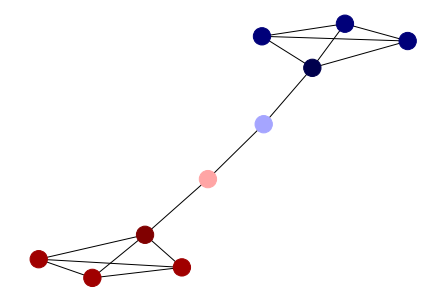

In [18]:
graph = nx.from_numpy_matrix(adj)
nx.draw(graph, node_color=evecs[:,1], cmap=plt.cm.seismic)
plt.show()